# 1/ Prise en main rapide (non évaluée) 

# Introduction

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

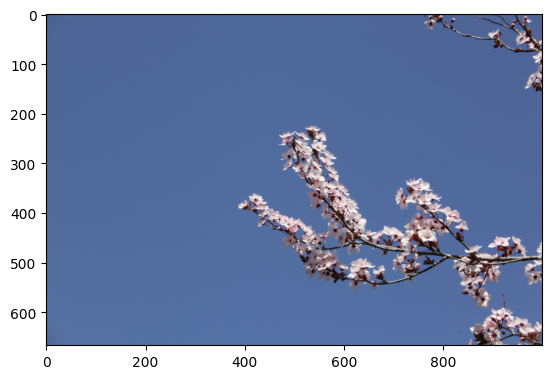

In [2]:
#Ouvrir une image
img = cv.imread("imagesTP/CerisierP.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

#Afficher une image
plt.figure()
plt.imshow(img)

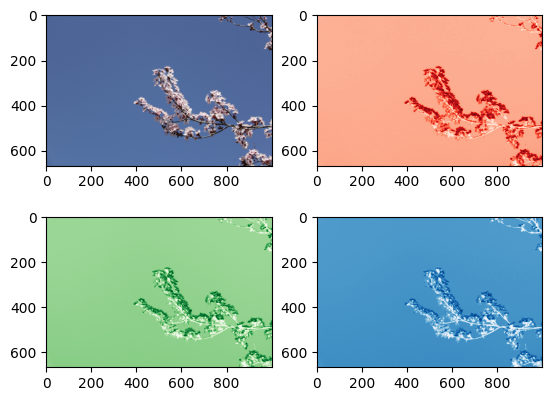

In [3]:
#Afficher les canaux
rouge = img[:,:, 0]
vert = img[:,:, 1]
bleu = img[:,:, 2]
plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.subplot(2, 2, 2)
plt.imshow(rouge, cmap="Reds")
plt.subplot(2, 2, 3)
plt.imshow(vert, cmap="Greens")
plt.subplot(2, 2, 4)
plt.imshow(bleu, cmap="Blues")

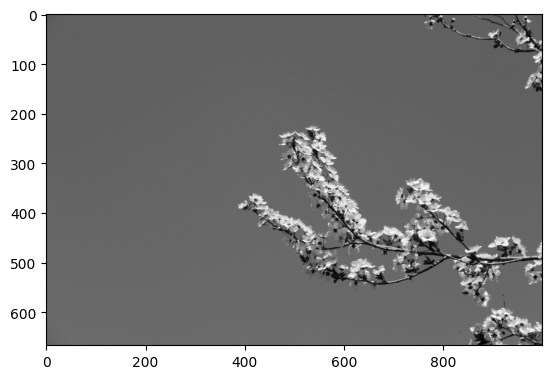

In [4]:
# Transformation en niveau de gris
imgG = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
plt.figure()
plt.imshow(imgG, cmap="gray")

plt.show()

In [61]:
def histogramme(img):
    # Initialiser un tableau pour stocker les comptes des intensités de pixels
    histogramme = np.zeros(256, dtype=int)
    
    # Obtenir les dimensions de l'image
    height, width = img.shape
    
    # Parcourir chaque pixel de l'image
    for y in range(height):
        for x in range(width):
            # Obtenir la valeur de l'intensité du pixel
            pixel_value = img[y, x]
            # Incrémenter le compteur correspondant dans l'histogramme
            histogramme[pixel_value] += 1
    
    
    
    return histogramme
    

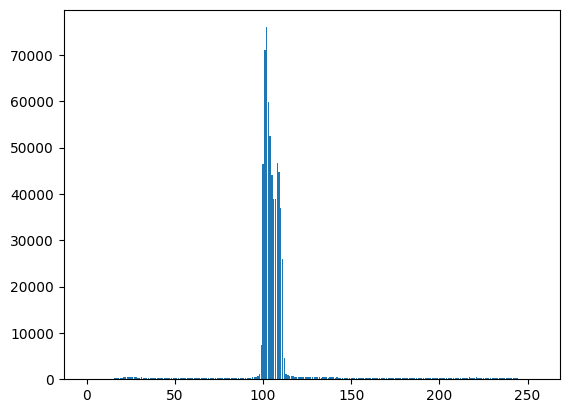

In [62]:
hist=histogramme(imgG)
plt.bar(range(256), hist)
plt.show()

In [63]:
def binarisation(img, seuil):
    # Initialiser une image binaire de la même taille que l'image en niveaux de gris
    image_binaire = np.zeros_like(img)
    
    # Appliquer le seuil pour chaque pixel
    height, width = img.shape
    for y in range(height):
        for x in range(width):
            if img[y, x] > seuil:
                image_binaire[y, x] = 255  # Pixel blanc
            else:
                image_binaire[y, x] = 0  # Pixel noir
    
    return image_binaire
    

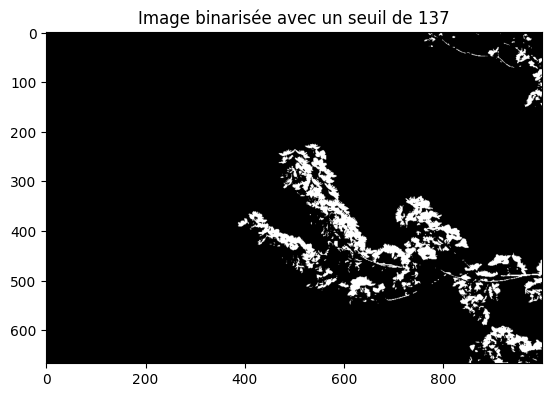

In [64]:
image_binarisée=binarisation(imgG, 137)
plt.figure()
plt.imshow(image_binarisée, cmap="gray")
plt.title('Image binarisée avec un seuil de 137')
plt.show()

In [65]:
def binarisation_automatique(img):
    # Calculer l'histogramme de l'image
    hist = histogramme(img)

    total_pixels = np.sum(hist)  # Nombre total de pixels dans l'image
    
    # Calcul des moments statistiques
    def calculer_moment(hist, n):
        total_pixels = np.sum(hist)
        somme_poids = 0
        for i in range(256):
            poids = i**n * np.int64(hist[i]) / total_pixels
            somme_poids += poids
        return somme_poids

    m0 = calculer_moment(hist, 0)
    print("m0",m0)

    

    m1 = calculer_moment(hist, 1)
    print("m1",m1)

    m2 = calculer_moment(hist, 2)
    print("m2",m2)


    
    m3 = calculer_moment(hist, 3)
    print("m3",m3)

    # Formulation du système d'équations
    A = np.array([
        [m0, m1],
        [m1, m2]
    ])
    B = np.array([-m2, -m3])
    
    # Résoudre le système d'équations
    c0, c1 = np.linalg.solve(A, B)
    print("c0",c0)
    print("c1",c1)

    # Résolution de l'équation quadratique
    a = 1
    b = c1
    c = c0
    delta = b**2 - 4*a*c
    seuil1 = (-b + np.sqrt(delta)) / (2*a)
    seuil2 = (-b - np.sqrt(delta)) / (2*a)
    seuil = (seuil1 + seuil2) / 2
    print("seuil",seuil)
    

    # Binarisation de l'image
    image_binaire = binarisation(img, seuil)

    return image_binaire

m0 1.0000000000000004
m1 107.8287406296851
m2 12188.106716641681
m3 1468748.7421229382
c0 17508.3182903985
c1 -275.4036153406099
seuil 137.70180767030496


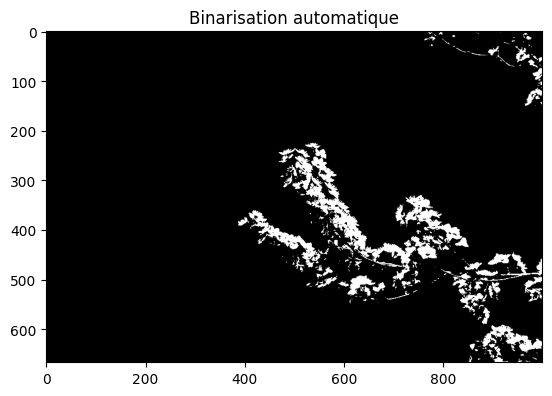

In [66]:
image_binarisée=binarisation_automatique(imgG)
plt.figure()
plt.imshow(image_binarisée, cmap="gray")
plt.title("Binarisation automatique")
plt.show()

In [67]:
def histogrammeCumule(hist):
        histCum = np.zeros(256)
        histCum[0] = hist[0]
        for i in range(1, 256):
            histCum[i] = histCum[i-1] + hist[i]
        return histCum

In [68]:
histCum = histogrammeCumule(hist)

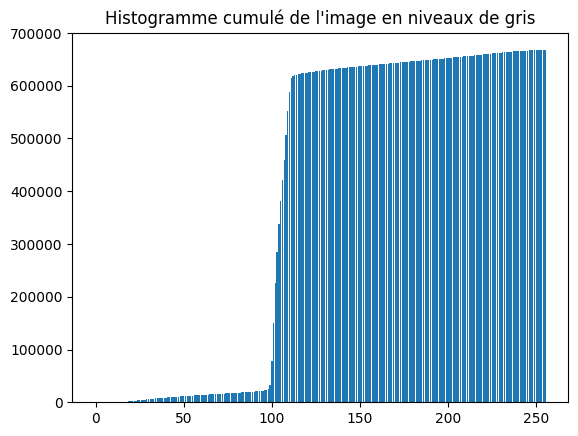

In [69]:
plt.figure()
plt.bar(range(256), histCum)
plt.title('Histogramme cumulé de l\'image en niveaux de gris')
plt.show()

In [70]:
def egalisationHistogramme(img):
        hist = histogramme(img)
        histCum = histogrammeCumule(hist)
        histCum = (histCum - histCum.min()) * 255 / (histCum.max() - histCum.min())
        imgE = histCum[img]
        return imgE

In [71]:
egalisee = egalisationHistogramme(imgG)

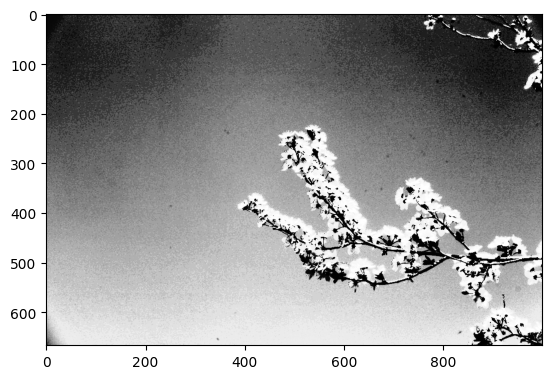

In [56]:
plt.figure()
plt.imshow(egalisee, cmap="gray")
plt.show()

In [72]:
def affichage_fonction_repartition(histCum):
    plt.figure()
    plt.plot(range(256), histCum)
    plt.title('Fonction de répartition')
    plt.show()

In [73]:
def affichage_histogramme_egalise(img):
    hist = histogramme(img)
    histCum = histogrammeCumule(hist)
    histCum = (histCum - histCum.min()) * 255 / (histCum.max() - histCum.min())
    affichage_fonction_repartition(histCum)
    plt.figure()
    

# Manipulation de l'image de la rue


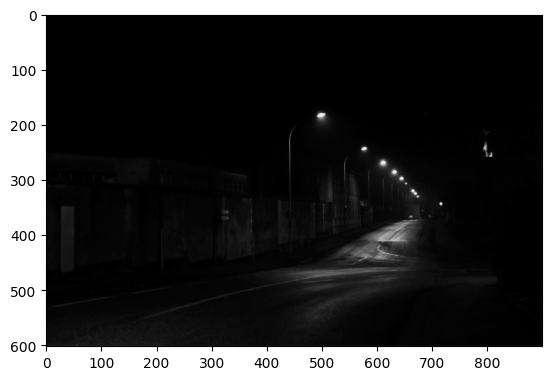

In [75]:
#Ouvrir une image
img2 = cv.imread("imagesTP/rue.jpg")
img2 = cv.cvtColor(img,cv.COLOR_BGR2RGB)

#Afficher une image
plt.figure()
plt.imshow(img)

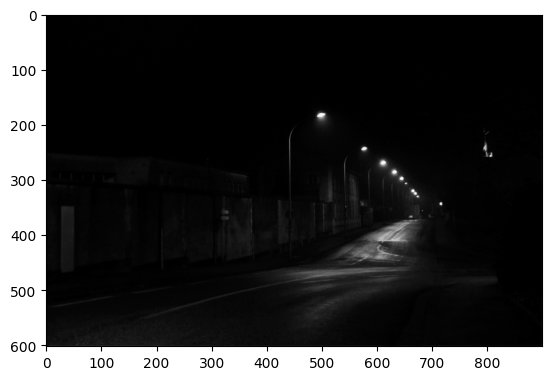

In [77]:
# Transformation en niveau de gris
imgG2 = cv.cvtColor(img2,cv.COLOR_RGB2GRAY)
plt.figure()
plt.imshow(imgG, cmap="gray")

plt.show()

In [78]:
hist2=histogramme(imgG2)
image_binarisée2=binarisation_automatique(imgG2)

m0 1.0000000000000004
m1 6.899959394610555
m2 271.1278663713547
m3 25775.378132152087
c0 466.80152548809235
c1 -106.94691804068177
seuil 53.47345902034088


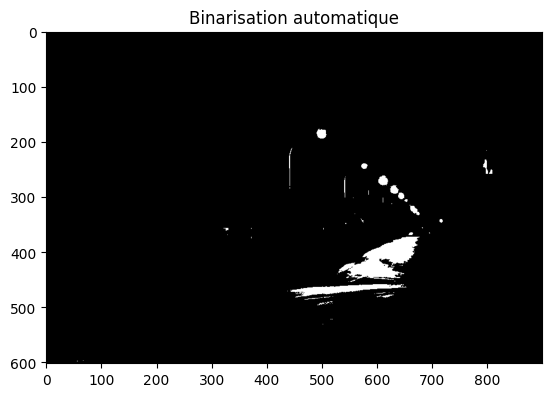

In [79]:
plt.figure()
plt.imshow(image_binarisée2, cmap="gray")
plt.title("Binarisation automatique")
plt.show()

In [80]:
histCum2 = histogrammeCumule(hist2)


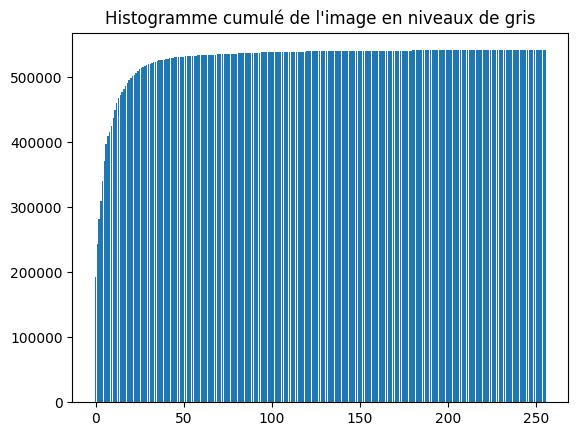

In [81]:
plt.figure()
plt.bar(range(256), histCum2)
plt.title('Histogramme cumulé de l\'image en niveaux de gris')
plt.show()

In [82]:
egalisee2 = egalisationHistogramme(imgG2)

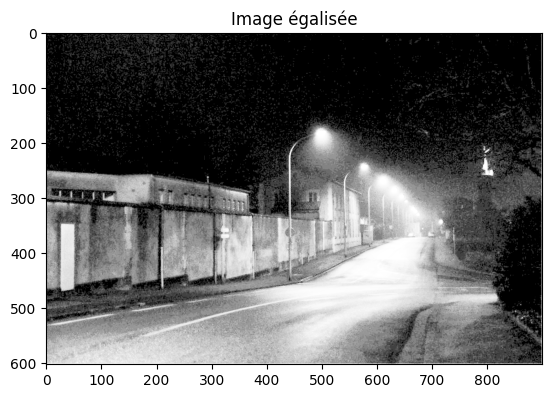

In [83]:
plt.figure()
plt.imshow(egalisee2, cmap="gray")
plt.title("Image égalisée")
plt.show()

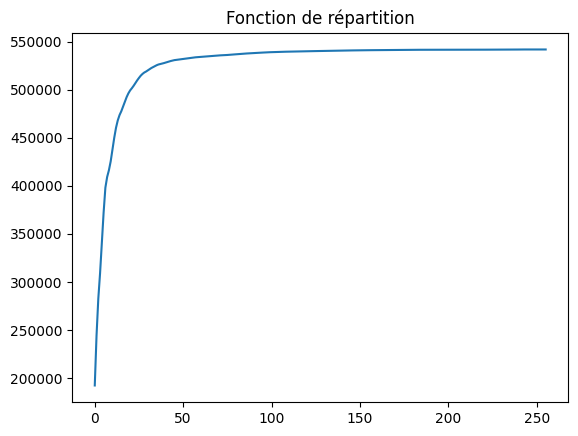

In [84]:
affichage_repartion_rue=affichage_fonction_repartition(histCum2)

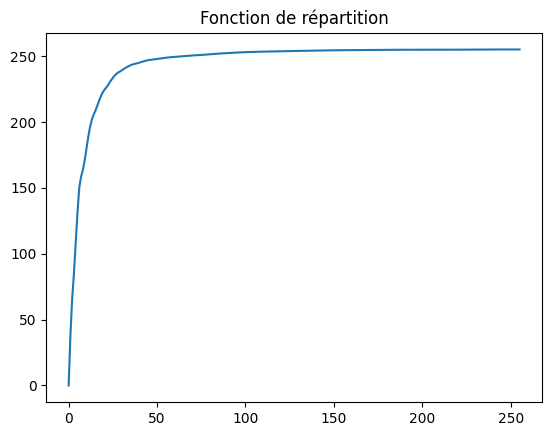

In [86]:
affichage_histogramme_egalise_rue=affichage_histogramme_egalise(imgG2)


In [89]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

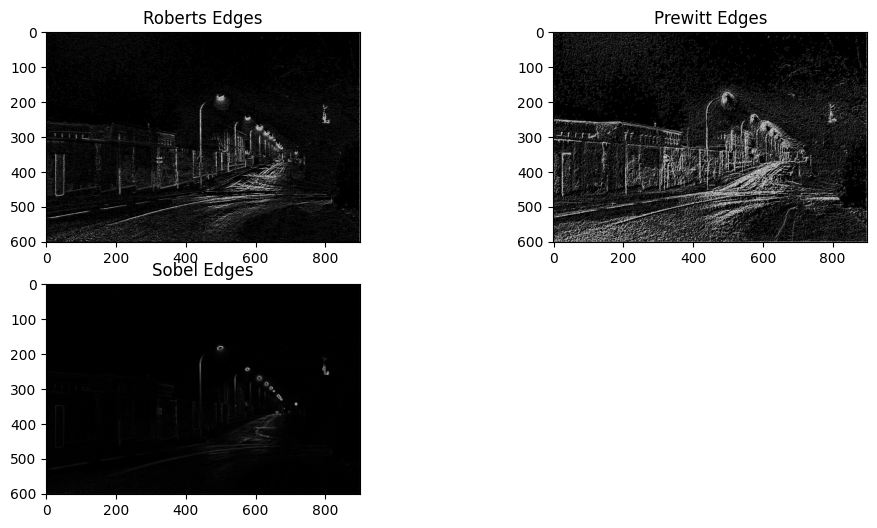

In [90]:
def detect_contours(image):
        # Convertir l'image en niveaux de gris
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Appliquer les filtres de Roberts
        roberts_x = np.array([[1, 0], [0, -1]])
        roberts_y = np.array([[0, 1], [-1, 0]])
        roberts_x_edges = cv2.filter2D(gray, -1, roberts_x)
        roberts_y_edges = cv2.filter2D(gray, -1, roberts_y)
        roberts_edges = np.sqrt(np.square(roberts_x_edges) + np.square(roberts_y_edges))
        
        # Appliquer les filtres de Prewitt
        prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
        prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
        prewitt_x_edges = cv2.filter2D(gray, -1, prewitt_x)
        prewitt_y_edges = cv2.filter2D(gray, -1, prewitt_y)
        prewitt_edges = np.sqrt(np.square(prewitt_x_edges) + np.square(prewitt_y_edges))
        
        # Appliquer les filtres de Sobel
        sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
        sobel_edges = np.sqrt(np.square(sobel_x) + np.square(sobel_y))
        
        # Afficher les résultats
        plt.figure(figsize=(12, 6))
        plt.subplot(2, 2, 1), plt.imshow(roberts_edges, cmap='gray'), plt.title('Roberts Edges')
        plt.subplot(2, 2, 2), plt.imshow(prewitt_edges, cmap='gray'), plt.title('Prewitt Edges')
        plt.subplot(2, 2, 3), plt.imshow(sobel_edges, cmap='gray'), plt.title('Sobel Edges')
        plt.show()

# Charger l'image
image = cv2.imread('imagesTP/rue.jpg')

# Détecter les contours
detect_contours(image)

# 2/ Transformée de Fourier 

 - A partir de sa définition proposer une méthodologie réalisant le calcul de la 
transformée de Fourier 2D sachant que l’on possède la fonction fft permettant 
de calculer une TFD 1D. 

Sans vraiment tourner autour du pot, afin de réaliser une transformée de Fourier en 2D à partir de transfromée de Fourier 1D, il nous suffit de la faire sur les deux dimensions que nous avons aà notre disposition.

## a. Harmoniques pures 

In [92]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
from mpl_toolkits import mplot3d


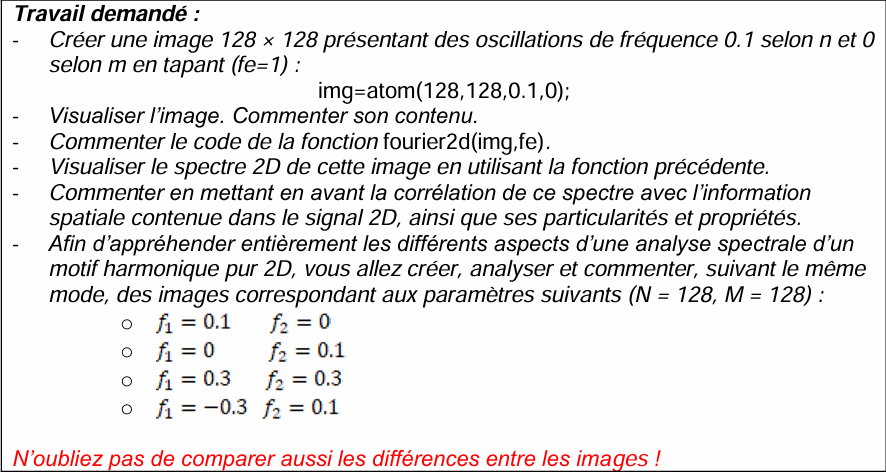

In [93]:
def affiche_image(img):
    plt.figure()
    plt.imshow(img,cmap="gray")
    plt.colorbar()

In [94]:
def  atom(n,m,fx,fy):
    img=np.zeros((n, m))
    x = np.array(np.arange(0,m))
    y = np.arange(0,n)
    e1 = np.exp(1j*2*np.pi*fx*x)
    e2 = np.exp(1j*2*np.pi*fy*y)
    for i in range(n):
        for j in range(m):
            img[i,j] = np.real(e2[i]*np.conjugate(e1[j]))
    return img


- f1 = 0,1  f2 = 0

In [99]:
img = atom(128,128,0.1,0)

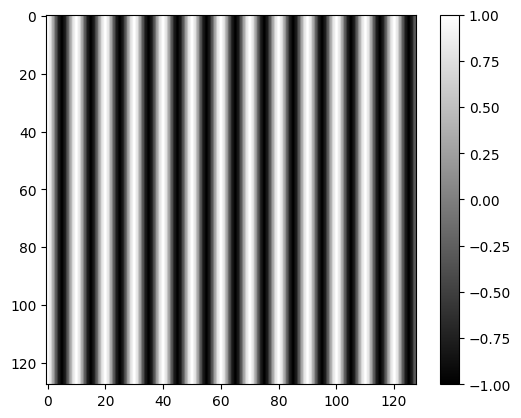

In [96]:
affiche_image(img)

Sur l'image ci-dessus, on observe une image avec des rayures noirs.Certes j'ia rentré les informatons afin d'obtenir ce résultat,mais il est impossible dans l'état actuel des choses d'en retirer quoique que ce soit.

In [97]:
def fourier2d(img,fe):
    [height, width] =img.shape #taille de l'image

    f = np.abs(np.fft.fftshift(np.fft.fft2(img))) #calcul de la transformée de fourier
    n = width/2
    m = height/2

    plt.figure()
    ax = plt.axes(projection='3d') #affichage en 3D
    x = np.arange(-n/width, n/width, float(fe/width)) #création des axes
    y = np.arange(-m/height, m/height, float(fe/height)) #création des axes
    X, Y = np.meshgrid(x, -y) #création de la grille
    print(X.shape) #affichage de la taille de la grille
    ax.plot_surface(X, Y, np.sqrt(f)) #affichage de la surface
    plt.title({"Spectre - 1"})  
    plt.xlabel("Fx") 
    plt.ylabel("Fy")

    plt.figure()
    plt.imshow(np.log(5*f+1),extent=[-n/width, n/width, -m/height, m/height]) #affichage du spectre
    plt.colorbar()
    plt.xlabel("Fx")
    plt.ylabel("Fy")
    plt.title("Spectre - 2")

(128, 128)


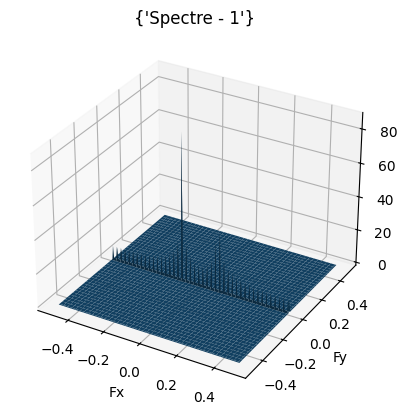

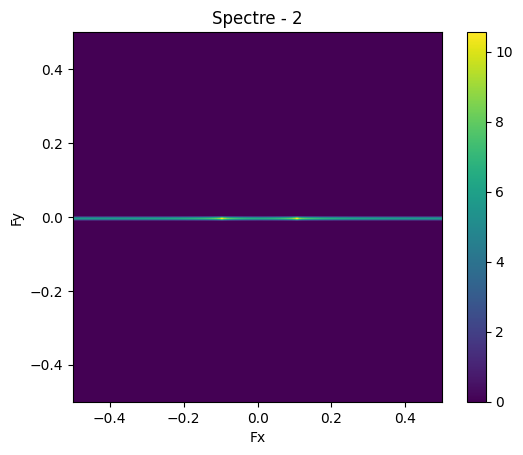

In [98]:
fourier2d(img,1)

Sur les deux figures précèdentes,on peut voir le fait que les piques majeurs observables dans l'afficahage 3D, se retrouvent aussi dans l'affichage 2D à l'aide des deux zones jaunes.
On peut aussi voir que l'échelle d'amplitude n'est plus la même, passant de [0-80] à [0-10]

- f1 = 0  f2 = 0,1

In [100]:
img2 = atom(128,128,0,0.1)

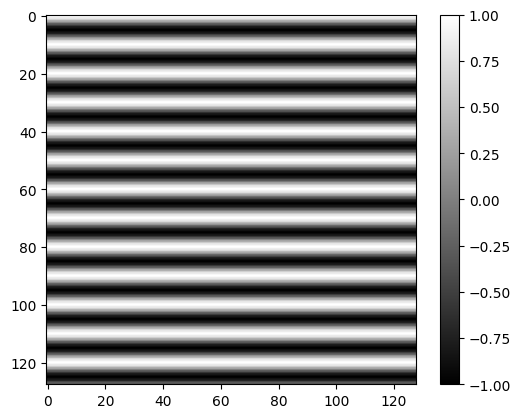

In [101]:
affiche_image(img2)

(128, 128)


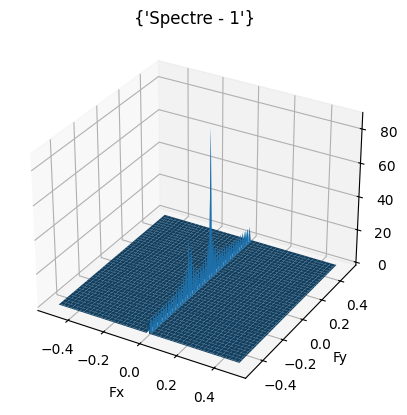

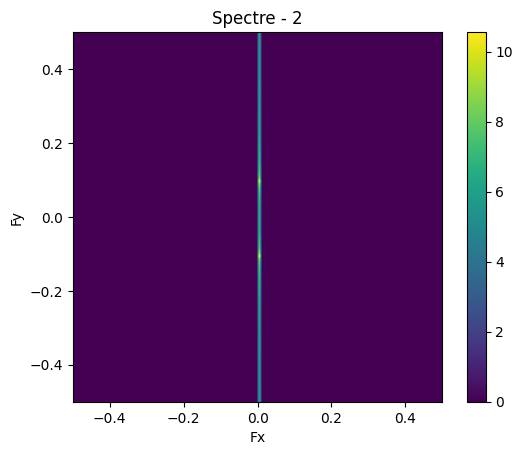

In [102]:
fourier2d(img2,1)

Cette fois ci, nous avons inversé les raies de l'image, ainsi que l'orientation spatiale des spectres.
De plus,on peut observer que les piques sont situés à f2 et -f2.

- f1 = 0,3  f2 = 0,3

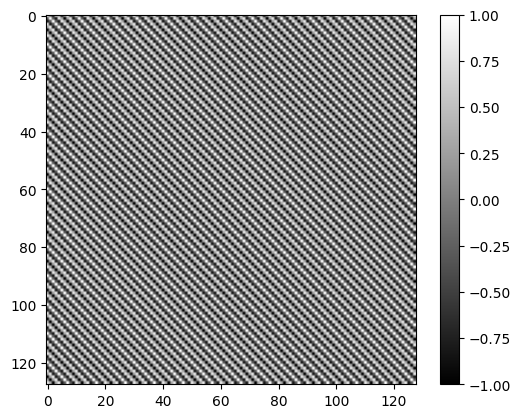

In [103]:
img3 = atom(128,128,0.3,0.3)
affiche_image(img3)

(128, 128)


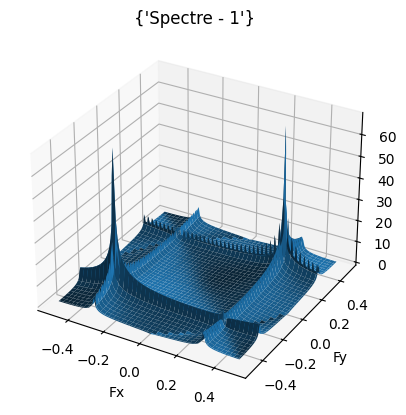

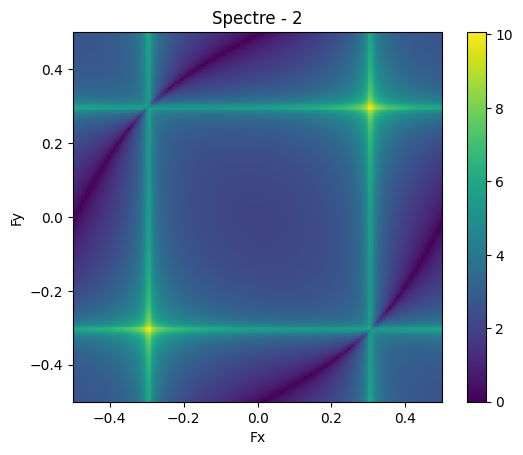

In [104]:
fourier2d(img3,1)

En mettant de côté l'aspect graphique du résultat, on peut remarquer que la crétion des piques aux fréquences mises en paramètres, ainsi que leurs complémentaires se valide.
Néanmoins,dans celui-ci, alors que je pensais que nous allons avoir quatres points remarquables,on n'en a finalement que deux, en (-0,3;-0,3) et (0,3;0,3).
On peut conjecturer que seuls les valeurs mises en paramètres et l'inverse direct possèdent des piques reconnaissables,et non toutes les combinaisons.


- f1 = -0,3  f2 = 0,1

In [114]:
img4 = atom(128,128,-0.3,0.1)

(128, 128)


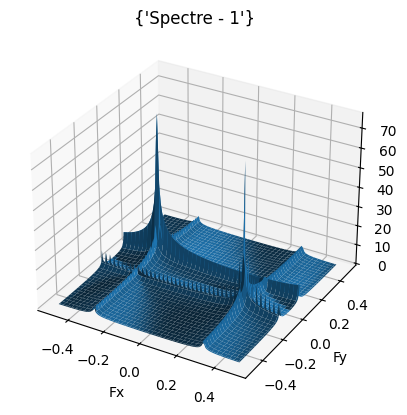

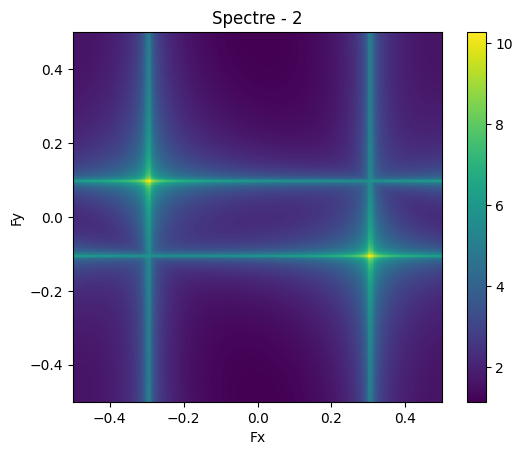

In [106]:
fourier2d(img4,1)

La conjecture émise à l'image précèdente se vérifie râce à celle-ci.
Cependant, les courbes qui s'étaient crées sur l'image juste avant ne se retrouvant plus ici.

## b. Contour 

In [133]:
horizontal = cv.imread("imagesTP/horizontal.png", cv.IMREAD_GRAYSCALE)
vertical = cv.imread("imagesTP/vertical.png", cv.IMREAD_GRAYSCALE)
oblique = cv.imread("imagesTP/oblique.png", cv.IMREAD_GRAYSCALE)

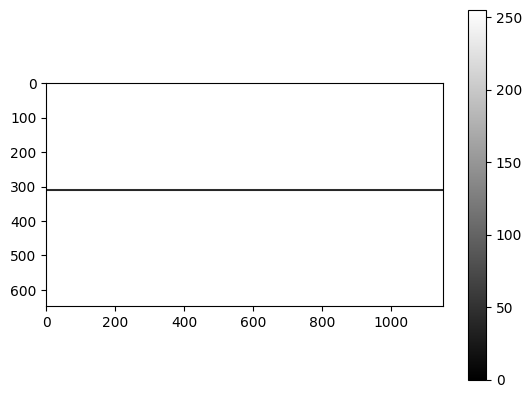

In [127]:
affiche_image(horizontal)

(648, 1152)


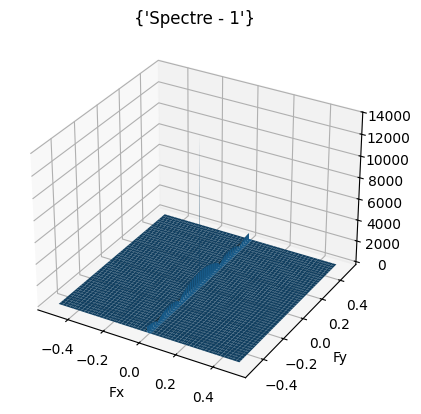

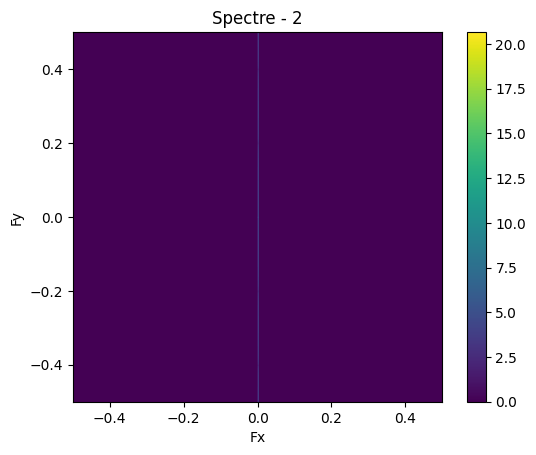

In [128]:
fourier2d(horizontal,1)

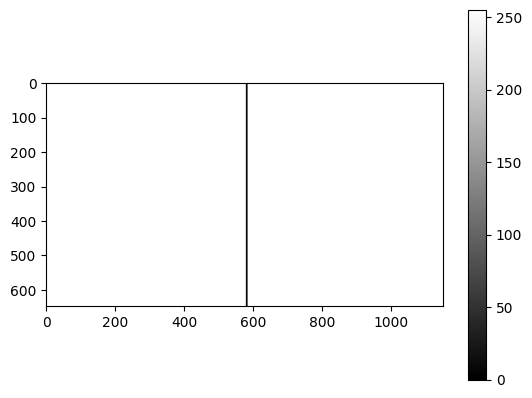

In [129]:
affiche_image(vertical)

(648, 1152)


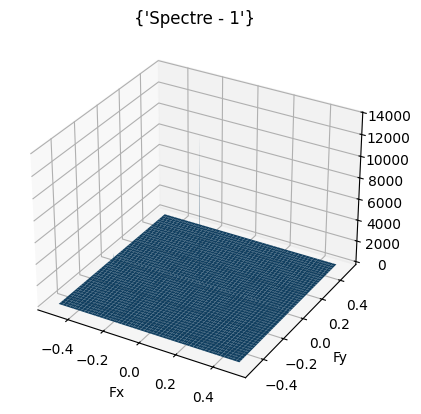

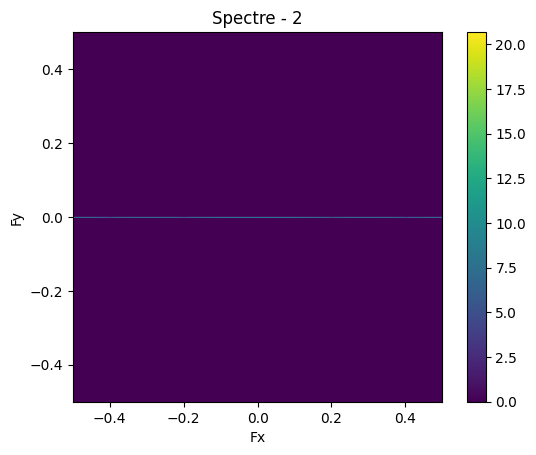

In [130]:
fourier2d(vertical,1)

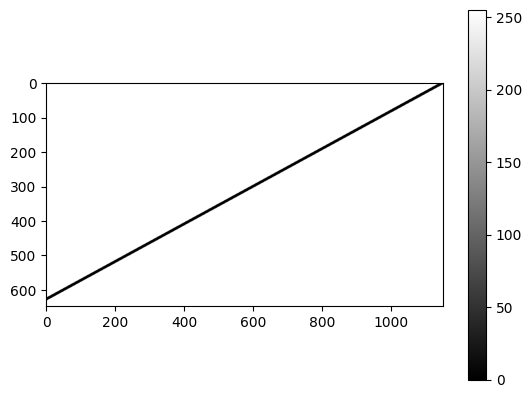

In [134]:
affiche_image(oblique)

(648, 1152)


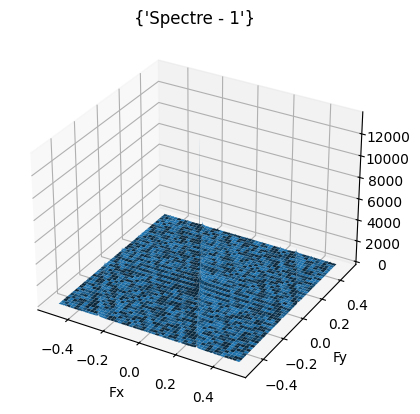

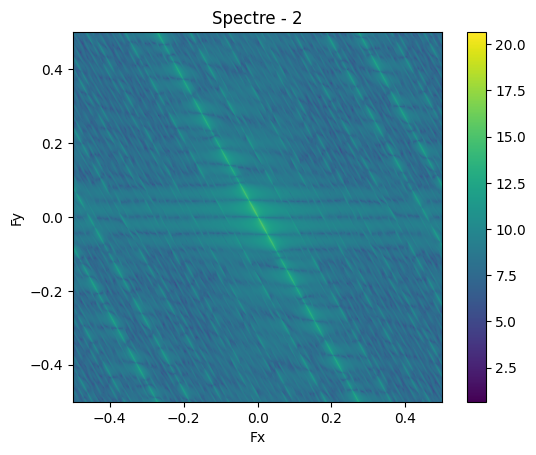

In [135]:
fourier2d(oblique,1)